# Install All Dependency 

In [1]:
#with image data in a patch-based manner
!pip install patchify

In [2]:
#Image segmentation in computer vision
!pip install -U segmentation-models


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 808.7 kB/s eta 0:00:00


In [3]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [4]:
from patchify import patchify, unpatchify

In [5]:
import segmentation_models as sm

2024-02-15 15:15:52.744496: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 15:15:52.744609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 15:15:53.055396: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Segmentation Models: using `tf.keras` framework.


# Import Library 

In [6]:
import os
import cv2
from PIL import Image
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [7]:
pip install -U segmentation-models==0.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 594.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.0 MB/s eta 0:00:00
  Attempting uninstall: image-classifiers
    Found existing installation: image-classifiers 1.0.0
    Uninstalling image-classifiers-1.0.0:
      Successfully uninstalled image-classifiers-1.0.0
  Attempting uninstall: segmentation-models
    Found existing installation: segmentation-models 1.0.1
    Uninstalling segmentation-models-1.0.1:
      Successfully uninstalled segmentation-models-1.0.1
Note: you may need to restart the kernel to use updated packages.


In [8]:
!ls "/kaggle/input/datames/DBX"
!ls -lah '/kaggle/input/datames/DBX'

'Tile 1'  'Tile 3'  'Tile 5'  'Tile 7'	 classes.json
'Tile 2'  'Tile 4'  'Tile 6'  'Tile 8'
total 4.0K
drwxr-xr-x 10 nobody nogroup   0 Feb 15 07:49  .
drwxr-xr-x  3 nobody nogroup   0 Feb 15 07:49  ..
drwxr-xr-x  4 nobody nogroup   0 Feb 15 07:49 'Tile 1'
drwxr-xr-x  4 nobody nogroup   0 Feb 15 07:49 'Tile 2'
drwxr-xr-x  4 nobody nogroup   0 Feb 15 07:49 'Tile 3'
drwxr-xr-x  4 nobody nogroup   0 Feb 15 07:49 'Tile 4'
drwxr-xr-x  4 nobody nogroup   0 Feb 15 07:49 'Tile 5'
drwxr-xr-x  4 nobody nogroup   0 Feb 15 07:49 'Tile 6'
drwxr-xr-x  4 nobody nogroup   0 Feb 15 07:49 'Tile 7'
drwxr-xr-x  4 nobody nogroup   0 Feb 15 07:49 'Tile 8'
-rw-r--r--  1 nobody nogroup 548 Feb 15 07:49  classes.json


In [9]:
dataset = '/kaggle/input/datames/'
dataset_name = 'DBX'

In [10]:
for path, subdirs,files in os.walk(dataset):
  print(path)

/kaggle/input/datames/
/kaggle/input/datames/DBX
/kaggle/input/datames/DBX/Tile 7
/kaggle/input/datames/DBX/Tile 7/images
/kaggle/input/datames/DBX/Tile 7/masks
/kaggle/input/datames/DBX/Tile 8
/kaggle/input/datames/DBX/Tile 8/images
/kaggle/input/datames/DBX/Tile 8/masks
/kaggle/input/datames/DBX/Tile 2
/kaggle/input/datames/DBX/Tile 2/images
/kaggle/input/datames/DBX/Tile 2/masks
/kaggle/input/datames/DBX/Tile 5
/kaggle/input/datames/DBX/Tile 5/images
/kaggle/input/datames/DBX/Tile 5/masks
/kaggle/input/datames/DBX/Tile 1
/kaggle/input/datames/DBX/Tile 1/images
/kaggle/input/datames/DBX/Tile 1/masks
/kaggle/input/datames/DBX/Tile 3
/kaggle/input/datames/DBX/Tile 3/images
/kaggle/input/datames/DBX/Tile 3/masks
/kaggle/input/datames/DBX/Tile 6
/kaggle/input/datames/DBX/Tile 6/images
/kaggle/input/datames/DBX/Tile 6/masks
/kaggle/input/datames/DBX/Tile 4
/kaggle/input/datames/DBX/Tile 4/images
/kaggle/input/datames/DBX/Tile 4/masks


In [11]:
for path,subdirs,files in os.walk(dataset):
  dir_name = path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == "images":
    images = os.listdir(path)
    for image in images:
      if (image.endswith('.jpg')):
        print(image)

image_part_002.jpg
image_part_006.jpg
image_part_005.jpg
image_part_003.jpg
image_part_004.jpg
image_part_007.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
image_part_002.jpg
image_part_006.jpg
image_part_005.jpg
image_part_003.jpg
image_part_004.jpg
image_part_007.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
image_part_002.jpg
image_part_006.jpg
image_part_005.jpg
image_part_003.jpg
image_part_004.jpg
image_part_007.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
image_part_002.jpg
image_part_006.jpg
image_part_005.jpg
image_part_003.jpg
image_part_004.jpg
image_part_007.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
image_part_002.jpg
image_part_006.jpg
image_part_005.jpg
image_part_003.jpg
image_part_004.jpg
image_part_007.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
image_part_002.jpg
image_part_006.jpg
image_part_005.jpg
image_part_003.jpg
image_part_004.jpg
image_part_007.jpg
image_part_009.jpg
image_part_0

In [12]:
image_patch_size = 256

In [13]:
image = cv2.imread(f'{dataset}/{dataset_name}/Tile 7/images/image_part_001.jpg')
print(image)
print(image.shape)

[[[174 164 157]
  [187 177 170]
  [160 148 146]
  ...
  [ 44  43  52]
  [ 52  51  60]
  [103 103 109]]

 [[204 194 187]
  [190 179 175]
  [187 175 173]
  ...
  [ 49  48  57]
  [ 55  54  63]
  [120 120 126]]

 [[202 193 189]
  [176 167 163]
  [179 167 165]
  ...
  [ 52  51  60]
  [ 57  56  65]
  [130 130 136]]

 ...

 [[189 189 195]
  [198 198 204]
  [189 192 197]
  ...
  [130 134 139]
  [ 94  98 103]
  [ 86  92  97]]

 [[191 191 197]
  [192 195 200]
  [188 191 196]
  ...
  [215 219 220]
  [156 161 164]
  [121 126 129]]

 [[198 201 206]
  [198 201 206]
  [191 193 201]
  ...
  [198 203 202]
  [114 119 120]
  [ 87  92  93]]]
(2061, 1817, 3)


In [14]:
patched_image = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
print(patched_image.shape)

(8, 7, 1, 256, 256, 3)


In [15]:
minmaxscaler = MinMaxScaler()
image_x = patched_image[0,0,:,:]

print(image_x.shape)
image_y = minmaxscaler.fit_transform(image_x.reshape(-1,1)).reshape(image_x.shape)
print(image_y[0].shape)
print(image_y)

(1, 256, 256, 3)
(256, 256, 3)
[[[[0.68235294 0.64313725 0.61568627]
   [0.73333333 0.69411765 0.66666667]
   [0.62745098 0.58039216 0.57254902]
   ...
   [0.51372549 0.50980392 0.51764706]
   [0.34901961 0.33333333 0.35294118]
   [0.22352941 0.20784314 0.22745098]]

  [[0.8        0.76078431 0.73333333]
   [0.74509804 0.70196078 0.68627451]
   [0.73333333 0.68627451 0.67843137]
   ...
   [0.51764706 0.51372549 0.52941176]
   [0.37254902 0.36470588 0.38823529]
   [0.10588235 0.09019608 0.10980392]]

  [[0.79215686 0.75686275 0.74117647]
   [0.69019608 0.65490196 0.63921569]
   [0.70196078 0.65490196 0.64705882]
   ...
   [0.49019608 0.49019608 0.51372549]
   [0.34117647 0.3372549  0.37254902]
   [0.00392157 0.         0.02745098]]

  ...

  [[0.30980392 0.29411765 0.31372549]
   [0.41568627 0.4        0.41960784]
   [0.62352941 0.60784314 0.63137255]
   ...
   [0.05098039 0.00784314 0.01568627]
   [0.04313725 0.         0.        ]
   [0.07843137 0.03137255 0.02352941]]

  [[0.40784314

In [16]:
image = Image.fromarray(image)
print(type(image))
print(image)

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=1817x2061 at 0x7EABADBC5450>


In [17]:
files = os.scandir(dataset+dataset_name+"/Tile 7/images")
print(len([file for file in files]))

9


In [18]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [19]:
image = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(image[1][3])
patches = patchify(image, (2,2), step=3) 
print(type(patches))
print(patches.shape)

8
<class 'numpy.ndarray'>
(1, 1, 2, 2)


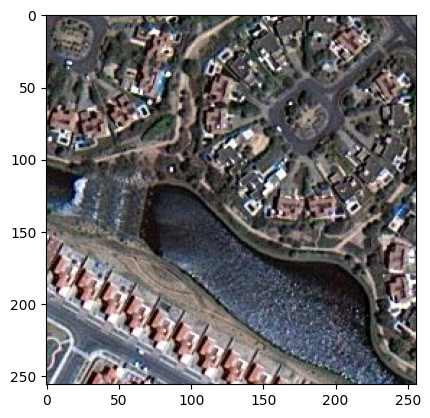

In [20]:
image_patch_size = 256

image  = cv2.imread(f'{dataset}/{dataset_name}/Tile 4/images/image_part_008.jpg')
patched_image  = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size) 
image = Image.fromarray(patched_image[0,0,0,:])

plt.imshow(image)

In [21]:

array = []
array.append(1)
array.append("yes")
print(array)

[1, 'yes']


In [22]:
image_id = 1
image_extension = 'jpg'
tile_id = 5
image_type = 'images'
image = cv2.imread(f'{dataset}{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}')
print(image)

[[[23 25 35]
  [25 27 37]
  [23 25 35]
  ...
  [61 48 56]
  [59 46 54]
  [58 45 53]]

 [[29 31 41]
  [34 36 46]
  [33 35 45]
  ...
  [59 46 54]
  [60 47 55]
  [62 49 57]]

 [[30 32 42]
  [39 41 51]
  [41 43 53]
  ...
  [56 43 51]
  [57 44 52]
  [61 48 56]]

 ...

 [[21 18 20]
  [33 31 31]
  [32 29 31]
  ...
  [ 8  3  4]
  [ 8  3  4]
  [ 8  3  4]]

 [[18 18 18]
  [18 19 17]
  [19 19 19]
  ...
  [11  6  7]
  [11  6  7]
  [13  8  9]]

 [[17 18 16]
  [18 19 17]
  [19 20 18]
  ...
  [11  6  7]
  [10  5  6]
  [12  7  8]]]


In [23]:
minmaxscaler = MinMaxScaler()
image_patch_size = 256
image_dataset = []
mask_dataset = []
for image_type in ['images','masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  else:
    image_extension = 'png'

  for tile_id in range(1,8):

    for image_id in range(1,10):

      image = cv2.imread(f'{dataset}{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}')
      if image is not None:

        if image_type == 'masks':
          image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


        # making the size multiple of pat
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        # print(f'{image.shape} - {size_x},{size_y}')

        cropped_image = image[0:size_y, 0:size_x] #cropping array 

        # image = Image.fromarray(image)

        patched_images = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

        for i in range(patched_images.shape[0]):

          for j in range(patched_images.shape[1]):

            if image_type == 'images':
              current_patched_image = patched_images[i,j,0,:]
              current_patched_image = minmaxscaler.fit_transform(current_patched_image.reshape(-1,1)).reshape(current_patched_image.shape) #normalization
              image_dataset.append(current_patched_image)
            else:
              current_patched_mask = patched_images[i,j,0,:]
              mask_dataset.append(current_patched_mask)

In [24]:
image_dataset  = np.array(image_dataset)
mask_dataset  = np.array(mask_dataset)

print(type(image_dataset))
print(type(mask_dataset))

print(image_dataset[0].shape)
print(mask_dataset[0].shape)

print(type(image_dataset[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
<class 'numpy.ndarray'>


In [25]:
print(image_dataset.shape)

(945, 256, 256, 3)


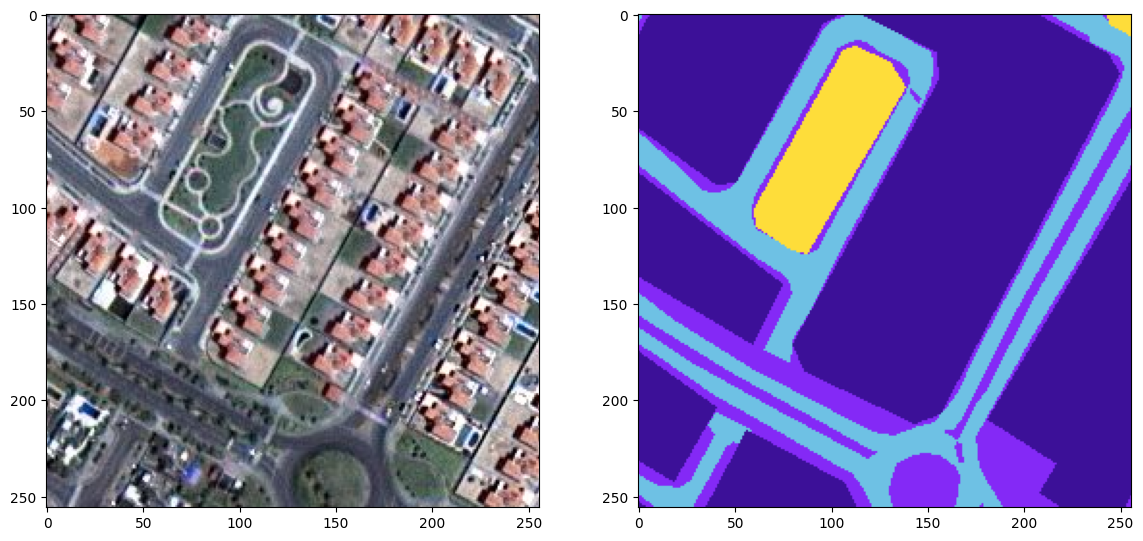

In [26]:
random_image_id = random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8)) 
plt.subplot(121)
plt.imshow(image_dataset[random_image_id]) #You can also any Image that you want if specific
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

# Converting Hexadecimal Color Codes Into RGB (Red, Green, Blue) Values
*for class_land,class_road,class_vegetation,class_water,and class_unlabelled*

In [27]:
class_building  = '#3C1098'.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_building)

class_land  = '#8429F6'.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_land)

class_road  = '#6EC1E4'.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_road)

class_vegetation  = '#FEDD3A'.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_vegetation)

class_water  = '#E2A929'.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_water)

class_unlabelled  = '#9B9B9B'.lstrip('#')
class_unlabelled = np.array(tuple(int(class_unlabelled[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_unlabelled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [28]:
print(mask_dataset.shape)
arr = [[1,2,3],[1,5,3]]
print(np.unique(arr))
labl = np.array([1,2,3])
print(labl)
print(arr==labl)
np.all(arr==labl,axis=-1)

(945, 256, 256, 3)
[1 2 3 5]
[1 2 3]
[[ True  True  True]
 [ True False  True]]


array([ True, False])

In [29]:
print(np.all([[True,True,False],[False,True,True]],axis=1))

[False False]


*When you use the label "class_water" to generate a matrix of shape 256x256x3, each cell in the matrix will have either a true or false value. The third dimension of the matrix will have the same values for all cells, either all true or all false.*

*By applying the np.all function, you can obtain a 2D vector of size 256x256 with true or false values. The np.all function checks if all the values in each row of the matrix are true, and returns a vector indicating the result for each row. You can then use this vector to mark the corresponding label segment in the mask by assigning the appropriate values.*

In [30]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape,dtype = np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabelled, axis=-1)] = 5
  label_segment = label_segment[:,:,0]
  return label_segment

In [31]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [32]:
print(len(labels))
print(labels[0].shape)
print(labels[0])
labels = np.array(labels)

945
(256, 256)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [33]:
labels = np.expand_dims(labels,axis=3)
print("Total unique values {}".format(np.unique(labels)))
print(labels.shape)

Total unique values [0 1 2 3 4 5]
(945, 256, 256, 1)


*Matplotlib library to display an image represented*

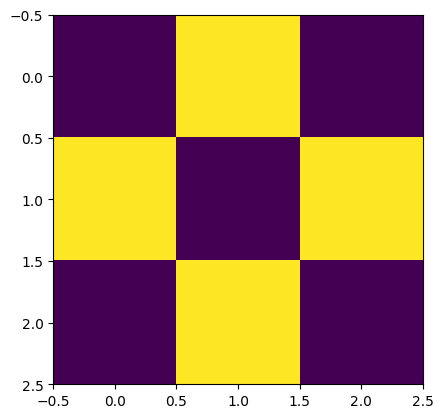

In [34]:
colValues = np.array([[1,2,1],[2,1,2],[1,2,1]])
plt.imshow(colValues)

(256, 256, 3)
[[0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


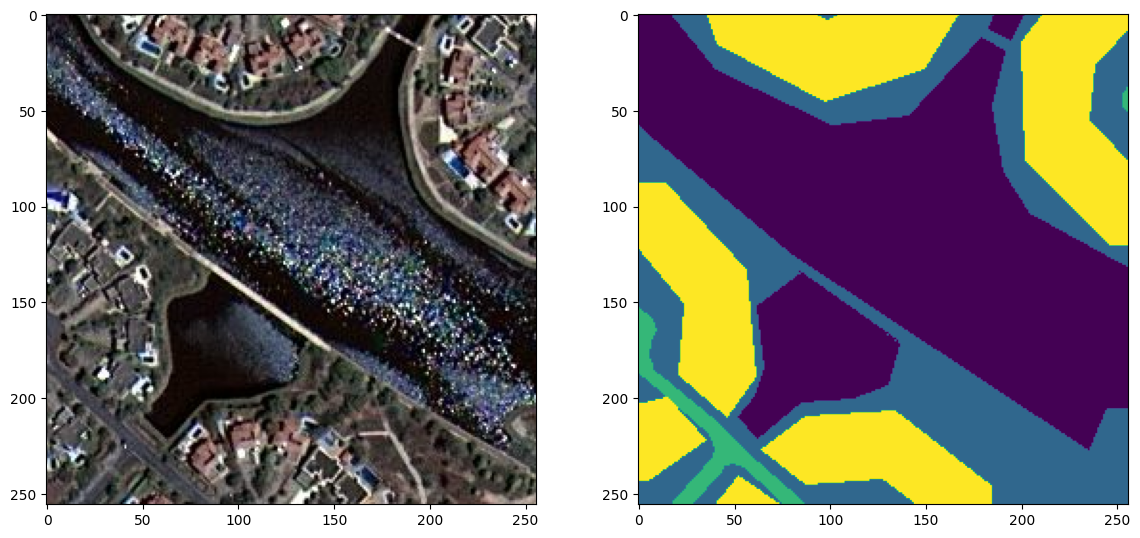

In [35]:
random_image_id = random.randint(0,len(image_dataset))
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(image_dataset[random_image_id])
print(image_dataset[0].shape)
print(labels[random_image_id][:,:,0])

plt.subplot(222)
plt.imshow(labels[random_image_id][:,:,0]) 

In [36]:
total_classes = len(np.unique(labels))
print(total_classes)
print(labels[0,0,0])

6
[1]


In [37]:
values = [[1,2,3],[4,5,6]]
cat_values = to_categorical(values,7)
print(cat_values)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


In [38]:
labels_categorical_dataset = to_categorical(labels,num_classes=total_classes) 
print(labels_categorical_dataset.shape)
print(labels_categorical_dataset[0][0][0])

(945, 256, 256, 6)
[0. 1. 0. 0. 0. 0.]


In [39]:
master_training_dataset = image_dataset
print(master_training_dataset.shape)

(945, 256, 256, 3)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset,labels_categorical_dataset,test_size=0.15,random_state=100)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [42]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]
print(image_height,image_width,image_channels,total_classes)

256 256 3 6


# Deep Learning Model Training and Evaluation

*building blocks for constructing and training convolutional neural network models for tasks such as image classification, segmentation,and generation*

In [43]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [44]:
from keras import backend as Ks

In [45]:
def jaccard_coef(y_true,y_pred):
  y_true_flatten = Ks.flatten(y_true)
  y_pred_flatten = Ks.flatten(y_pred)
  intersection = Ks.sum( y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / ( Ks.sum(y_true_flatten) + Ks.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

**Multi - U-Net Architecture
**


In [46]:
def multi_unet_model(n_classes=5,image_height=256, image_width = 256, image_channels=1):

  inputs = Input((image_height,image_width,image_channels)) #defines the input layer of the neural network, creaters a tensor of the specified dimensions
  print("Input shape",inputs.shape)
  source_input = inputs

  c1 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(source_input)
  print(c1.shape)
  c1 = Dropout(0.2)(c1)
  print(c1.shape)
  c1 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c1)
  print(c1.shape)
  p1 = MaxPooling2D((2,2))(c1)
  print(p1.shape)

  c2 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p1)
  print(c2.shape)
  c2 = Dropout(0.2)(c2)
  print(c2.shape)
  c2 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c2)
  print(c2.shape)
  p2 = MaxPooling2D((2,2))(c2)
  print(p2.shape)

  c3 = Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p2)
  print(c3.shape)
  c3 = Dropout(0.2)(c3)
  print(c3.shape)
  c3 = Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c3)
  print(c3.shape)
  p3 = MaxPooling2D((2,2))(c3)
  print(p3.shape)

  c4 = Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p3)
  print(c4.shape)
  c4 = Dropout(0.2)(c4)
  print(c4.shape)
  c4 = Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c4)
  print(c4.shape)
  p4 = MaxPooling2D((2,2))(c4)
  print(p4.shape)

  c5 = Conv2D(256,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p4)
  print(c5.shape)
  c5 = Dropout(0.2)(c5)
  print(c5.shape)
  c5 = Conv2D(256,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c5)
  print(c5.shape)

  u6 = Conv2DTranspose(128,(2,2),strides=(2,2),padding="same")(c5)
  print(u6.shape)
  u6 = concatenate([u6,c4])
  print(u6.shape)
  c6 = Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u6)
  print(c6.shape)
  c6 = Dropout(0.2)(c6)
  print(c6.shape)
  c6 = Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c6)
  print(c6.shape)

  u7 = Conv2DTranspose(64,(2,2),strides=(2,2),padding="same")(c6)
  print(u7.shape)
  u7 = concatenate([u7,c3])
  print(u7.shape)
  c7 = Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u7)
  print(c7.shape)
  c7 = Dropout(0.2)(c7)
  print(c7.shape)
  c7 = Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c7)
  print(c7.shape)

  u8 = Conv2DTranspose(32,(2,2),strides=(2,2),padding="same")(c7)
  print(u8.shape)
  u8 = concatenate([u8,c2])
  print(u8.shape)
  c8 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u8)
  print(c8.shape)
  c8 = Dropout(0.2)(c8)
  print(c8.shape)
  c8 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c8)
  print(c8.shape)

  u9 = Conv2DTranspose(16,(2,2),strides=(2,2),padding="same")(c8)
  print(u9.shape)
  u9 = concatenate([u9,c1], axis=3)
  print(u9.shape)
  c9 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u9)
  print(c9.shape)
  c9 = Dropout(0.2)(c9)
  print(c9.shape)
  c9 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c9)
  print(c9.shape)

  outputs = Conv2D(n_classes,(1,1),activation="softmax")(c9)
  print(outputs.shape)
  model = Model(inputs=[inputs],outputs=[outputs])
  return model

In [47]:
metrics = ['accuracy', jaccard_coef]

In [48]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [49]:
model = get_deep_learning_model()

Input shape (None, 256, 256, 3)
(None, 256, 256, 16)
(None, 256, 256, 16)
(None, 256, 256, 16)
(None, 128, 128, 16)
(None, 128, 128, 32)
(None, 128, 128, 32)
(None, 128, 128, 32)
(None, 64, 64, 32)
(None, 64, 64, 64)
(None, 64, 64, 64)
(None, 64, 64, 64)
(None, 32, 32, 64)
(None, 32, 32, 128)
(None, 32, 32, 128)
(None, 32, 32, 128)
(None, 16, 16, 128)
(None, 16, 16, 256)
(None, 16, 16, 256)
(None, 16, 16, 256)
(None, 32, 32, 128)
(None, 32, 32, 256)
(None, 32, 32, 128)
(None, 32, 32, 128)
(None, 32, 32, 128)
(None, 64, 64, 64)
(None, 64, 64, 128)
(None, 64, 64, 64)
(None, 64, 64, 64)
(None, 64, 64, 64)
(None, 128, 128, 32)
(None, 128, 128, 64)
(None, 128, 128, 32)
(None, 128, 128, 32)
(None, 128, 128, 32)
(None, 256, 256, 16)
(None, 256, 256, 32)
(None, 256, 256, 16)
(None, 256, 256, 16)
(None, 256, 256, 16)
(None, 256, 256, 6)


In [50]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

In [51]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [52]:
weights = [1/6]*6

In [53]:
print(help(sm.losses.DiceLoss()))

Help on DiceLoss in module segmentation_models.losses object:

dice_loss = class DiceLoss(segmentation_models.base.objects.Loss)
 |  dice_loss(beta=1, class_weights=None, class_indexes=None, per_image=False, smooth=1e-05)
 |  
 |  Creates a criterion to measure Dice loss:
 |  
 |  .. math:: L(precision, recall) = 1 - (1 + \beta^2) \frac{precision \cdot recall}
 |      {\beta^2 \cdot precision + recall}
 |  
 |  The formula in terms of *Type I* and *Type II* errors:
 |  
 |  .. math:: L(tp, fp, fn) = \frac{(1 + \beta^2) \cdot tp} {(1 + \beta^2) \cdot fp + \beta^2 \cdot fn + fp}
 |  
 |  where:
 |       - tp - true positives;
 |       - fp - false positives;
 |       - fn - false negatives;
 |  
 |  Args:
 |      beta: Float or integer coefficient for precision and recall balance.
 |      class_weights: Array (``np.array``) of class weights (``len(weights) = num_classes``).
 |      class_indexes: Optional integer or list of integers, classes to consider, if ``None`` all classes are used.

In [54]:
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1*focal_loss)

# Model Compilation

In [55]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),loss=total_loss,metrics=metrics)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [58]:
model_history = model.fit(X_train,
                          y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data = (X_test,y_test),
                          shuffle=False)

Epoch 1/10
Cause: Unable to locate the source code of <function SumOfLosses.__call__ at 0x7eabd2e548b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2024-02-15 15:17:07.227266: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1708010235.455161      95 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


51/51 [==============================] - 40s 359ms/step - loss: 0.9941 - accuracy: 0.5788 - jaccard_coef: 0.3051 - val_loss: 0.9743 - val_accuracy: 0.6656 - val_jaccard_coef: 0.3103
Epoch 2/10
51/51 [==============================] - 10s 190ms/step - loss: 0.9687 - accuracy: 0.6990 - jaccard_coef: 0.4092 - val_loss: 0.9663 - val_accuracy: 0.6827 - val_jaccard_coef: 0.4178
Epoch 3/10
51/51 [==============================] - 10s 191ms/step - loss: 0.9580 - accuracy: 0.7273 - jaccard_coef: 0.4747 - val_loss: 0.9641 - val_accuracy: 0.7023 - val_jaccard_coef: 0.4623
Epoch 4/10
51/51 [==============================] - 10s 192ms/step - loss: 0.9514 - accuracy: 0.7489 - jaccard_coef: 0.5075 - val_loss: 0.9572 - val_accuracy: 0.7166 - val_jaccard_coef: 0.4748
Epoch 5/10
51/51 [==============================] - 10s 194ms/step - loss: 0.9449 - accuracy: 0.7642 - jaccard_coef: 0.5409 - val_loss: 0.9534 - val_accuracy: 0.7164 - val_jaccard_coef: 0.4961
Epoch 6/10
51/51 [============================

In [59]:
history_a = model_history

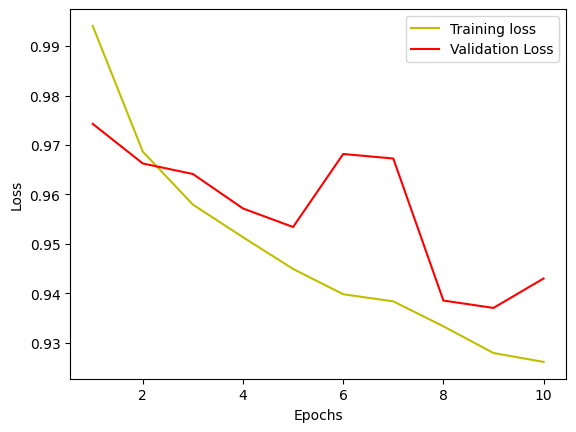

In [60]:
loss = history_a.history["loss"]
val_loss = history_a.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label="Training loss")
plt.plot(epochs,val_loss,'r',label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

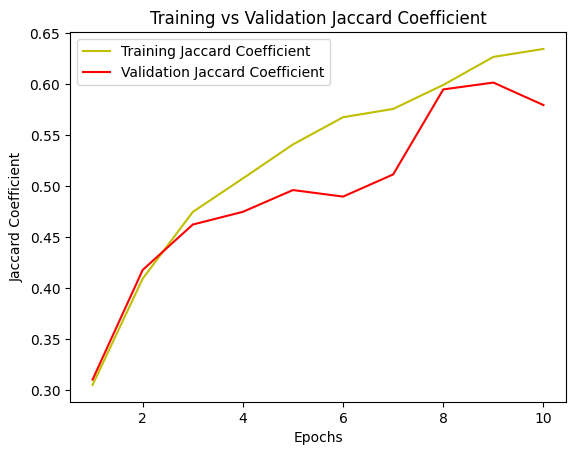

In [61]:
import matplotlib.pyplot as plt

jaccard_coeff = history_a.history["jaccard_coef"]
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coeff) + 1)
plt.plot(epochs, jaccard_coeff, 'y', label="Training Jaccard Coefficient")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation Jaccard Coefficient")
plt.title('Training vs Validation Jaccard Coefficient')
plt.xlabel("Epochs")
plt.ylabel("Jaccard Coefficient")
plt.legend()
plt.show()

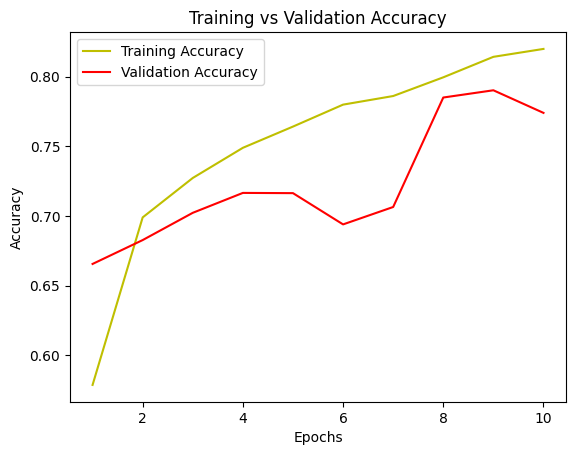

In [62]:
import matplotlib.pyplot as plt

accuracy = history_a.history["accuracy"]
val_accuracy = history_a.history["val_accuracy"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label="Validation Accuracy")
plt.title('Training vs Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [63]:
training_accuracy = jaccard_coeff[-1]
validation_accuracy = val_jaccard_coef[-1]
accuracy = accuracy[-1]
val_accuracy= val_accuracy[-1]

print("Training Jaccard Coefficient:", training_accuracy)
print("Validation Jaccard Coefficient:", validation_accuracy)
print("Training Accuracy:", accuracy)
print("Validation Val Accuracy:", val_accuracy)


Training Jaccard Coefficient: 0.6345319747924805
Validation Jaccard Coefficient: 0.5794703960418701
Training Accuracy: 0.8198713660240173
Validation Val Accuracy: 0.7739900350570679
